In [60]:
import numpy as np
import pandas as pd 

def create_normal_regression_data(
    n_samples=1000,
    x_mean=0,
    x_std=30,
    noise_std=5,
    w=0.6,
    b=10
):
    """
    Generate synthetic regression data:
    X ~ Normal(x_mean, x_std)
    y = w*X + b + noise
    
    Parameters
    ----------
    n_samples : number of points
    x_mean : average of X (we can center it at 0)
    x_std : how wide X spreads
    noise_std : noise added to y
    w, b : underlying linear relationship
    
    Returns:
        X (numpy array), y (numpy array)
    """
    # Generate normally distributed X
    X = np.random.normal(loc=x_mean, scale=x_std, size=n_samples)
    
    # Underlying true function (linear model)
    y = w * X + b
    
    # Add noise
    y += np.random.normal(loc=0, scale=noise_std, size=n_samples)
    
    return X, y


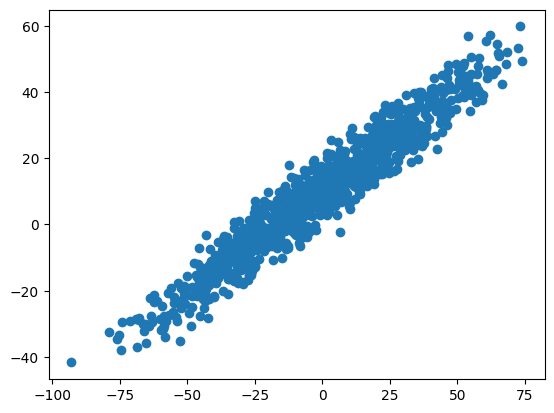

In [2]:
import matplotlib.pyplot as plt 

X, y = create_normal_regression_data()

plt.scatter(X, y)

In [38]:
import numpy as np

def create_nonlinear_regression_data(
    n_samples=15000,
    x_mean=0.0,
    x_std=33.0,         # ~99% of X in [-100, 100]
    noise_std=2.0,
    y_min=-5.0,
    y_max=75.0,
    random_state=None,
):
    """
    Creates a 1D nonlinear regression dataset with:
      - X ~ Normal(x_mean, x_std)
      - y = nonlinear(X) + noise, then scaled to [y_min, y_max]
    """
    if random_state is not None:
        np.random.seed(random_state)

    # 1) X: normal distribution
    X = np.random.normal(loc=x_mean, scale=x_std, size=n_samples)

    # 2) Nonlinear relationship (mix of quadratic + sine)
    #    Feel free to tweak this formula for different shapes
    y_raw = 0.02 * (X ** 2) + 0.3 * X + 10 * np.sin(X / 8.0)

    # 3) Add Gaussian noise
    y_raw = y_raw + np.random.normal(loc=0.0, scale=noise_std, size=n_samples)

    # 4) Scale y_raw into [y_min, y_max]
    raw_min, raw_max = y_raw.min(), y_raw.max()
    y_scaled = (y_raw - raw_min) / (raw_max - raw_min)  # -> [0, 1]
    y_scaled = y_scaled * (y_max - y_min) + y_min       # -> [y_min, y_max]

    return X.astype(np.float32), y_scaled.astype(np.float32)


In [39]:
X, y = create_nonlinear_regression_data()

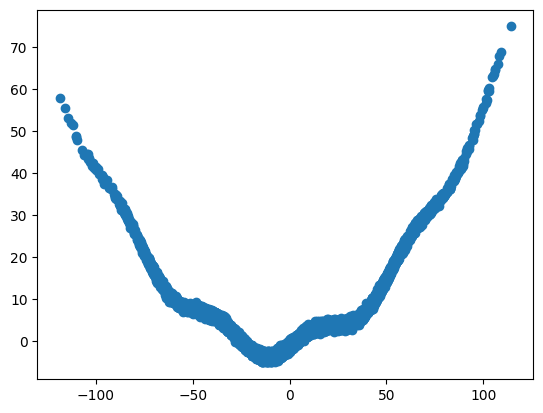

In [40]:
plt.scatter(X, y)

In [41]:
import tensorflow as tf 
import numpy as np 
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt 

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12000,), (12000,), (3000,), (3000,))

In [43]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [44]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.SGD(), 
               metrics=['mae'])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [45]:
model_1.evaluate(X_test, y_test)

94/94 [==============================] - 0s 2ms/step - loss: 4.7823 - mae: 4.7823


[4.782344818115234, 4.782344818115234]

In [46]:
y_pred_1 = model_1.predict(X_test)

94/94 [==============================] - 0s 936us/step


In [47]:
def plot_preds_vs_true(X_test=X_test, y_true=y_test, y_pred=y_pred_1):

    plt.figure(figsize=(10, 7))
    #plot X_test, y_test
    plt.scatter(X_test, y_true, c='g', label="Test Set")

    # Plot X_test, y_preds 

    plt.scatter(X_test, y_pred, c="r", label="Predictions")

    # Add legend 
    plt.legend();

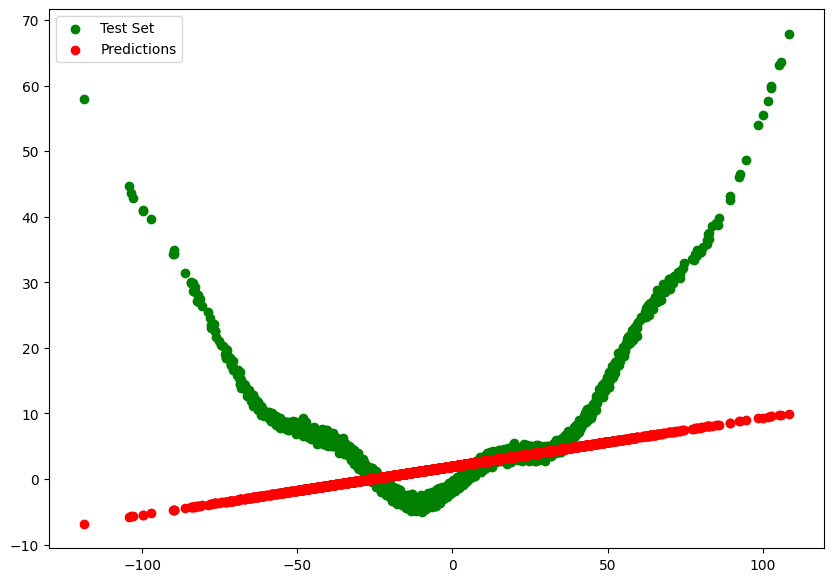

In [48]:
plot_preds_vs_true()

In [49]:
# model_2 

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
               metrics=[
                   tf.keras.losses.MeanAbsoluteError(name='mae'), 
                   tf.keras.losses.MeanSquaredError(name='mse'), 
                   tf.keras.losses.Huber(name='huber')
               ])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
375/375 [==============================] - 1s 3ms/step - loss: 1.9732 - mae: 1.9732 - mse: 13.6427 - huber: 1.5693
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 1.6106 - mae: 1.6106 - mse: 9.2421 - huber: 1.2226
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.9972 - mae: 0.9972 - mse: 3.0233 - huber: 0.6343
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.8668 - mae: 0.8668 - mse: 2.4502 - huber: 0.5203
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.8474 - mae: 0.8474 - mse: 2.3206 - huber: 0.5037
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.8317 - mae: 0.8317 - mse: 2.3214 - huber: 0.4913
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.8009 - mae: 0.8009 - mse: 2.2150 - huber: 0.4653
Epoch 8/100
375/375 [==============================] - 1s 2ms/step - loss: 0.8021 - mae: 0.8021 - mse: 2.2442 - huber

In [50]:
y_pred_2 = model_2.predict(X_test)

94/94 [==============================] - 0s 1ms/step


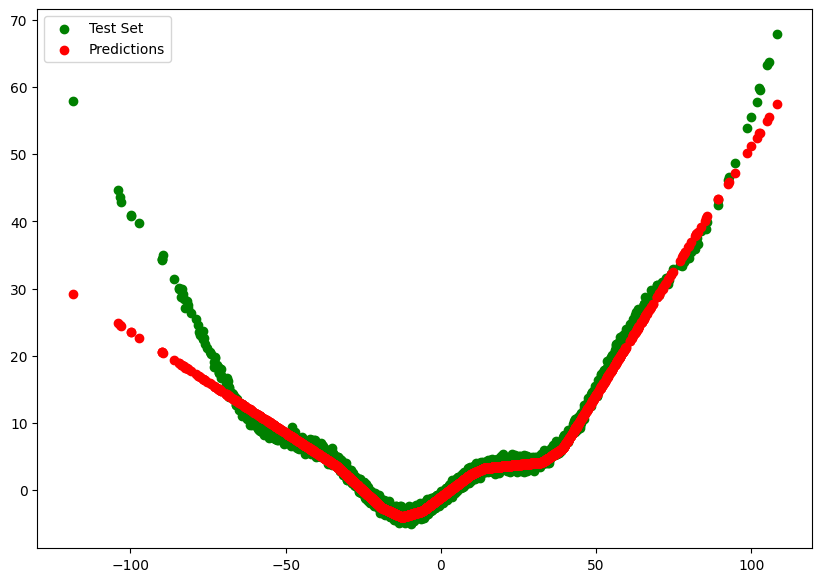

In [51]:
plot_preds_vs_true(y_pred=y_pred_2)

In [52]:
def calculate_mae_and_mse(y_true=y_test, y_pred=y_pred_1):
    return tf.keras.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred)).numpy(), tf.keras.metrics.mean_squared_error(y_true, tf.squeeze(y_pred)).numpy()

In [53]:
mae, mse = calculate_mae_and_mse()
mae, mse

(4.7823443, 66.378136)

## model_2 

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
               metrics=[
                   tf.keras.losses.MeanAbsoluteError(name='mae'), 
                   tf.keras.losses.MeanSquaredError(name='mse'), 
                   tf.keras.losses.Huber(name='huber')
               ])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

In [55]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (32, 100)                 200       
                                                                 
 dense_10 (Dense)            (32, 100)                 10100     
                                                                 
 dense_11 (Dense)            (32, 1)                   101       
                                                                 
Total params: 10401 (40.63 KB)
Trainable params: 10401 (40.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
model_3.evaluate(X_test, y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.4157 - mae: 0.4157 - mse: 0.2918 - huber: 0.1378


[0.41566407680511475,
 0.41573667526245117,
 0.29179853200912476,
 0.1377652883529663]

In [57]:
y_pred_3 = model_3.predict(X_test)

94/94 [==============================] - 0s 1ms/step


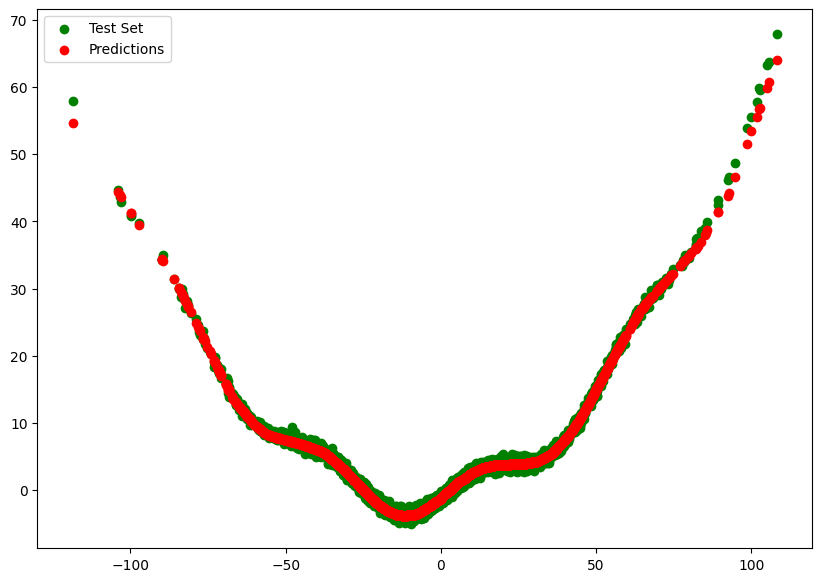

In [58]:
plot_preds_vs_true(y_pred=y_pred_3)

In [59]:
mae_1, mse_1 = calculate_mae_and_mse(y_pred=y_pred_1)
mae_2, mse_2 = calculate_mae_and_mse(y_pred=y_pred_2)
mae_3, mse_3 = calculate_mae_and_mse(y_pred=y_pred_3)

In [61]:
model_metrics = [
    ['model_1', mae_1, mse_1],
    ['model_2', mae_2, mse_2], 
    ['model_3', mae_3, mse_3]
]

model_metrics_df = pd.DataFrame(data=model_metrics, columns=['model', 'mae', 'mse'])
model_metrics_df

,model,mae,mse
0,model_1,4.782344,66.378136
1,model_2,0.725897,2.513469
2,model_3,0.415664,0.291841
